<a href="https://colab.research.google.com/github/mallang7/DeepLearning_basic/blob/master/tensorflow_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np
import time

start = time.time()

num_classes = 10

learning_rate = 0.0001
batch_size = 100
num_epochs = 30
# num_epochs = 5

In [58]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat(num_epochs).shuffle(60000).batch(batch_size).prefetch(batch_size)

In [59]:
class ConvNet(Model):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = layers.Conv2D(32, kernel_size=3, padding='same')
        self.batch1 = layers.BatchNormalization()
        self.act1 = layers.ReLU()
        self.maxpool1 = layers.MaxPool2D(2, strides=2)

        self.conv2 = layers.Conv2D(32, kernel_size=3, padding='same')
        self.batch2 = layers.BatchNormalization()
        self.act2 = layers.ReLU()
        self.maxpool2 = layers.MaxPool2D(2, strides=2)

        self.conv3 = layers.Conv2D(32, kernel_size=3, padding='same')
        self.batch3 = layers.BatchNormalization()
        self.act3 = layers.ReLU()
        self.maxpool3 = layers.MaxPool2D(2, strides=2)

        self.conv4 = layers.Conv2D(32, kernel_size=3, padding='same')
        self.batch4 = layers.BatchNormalization()
        self.act4 = layers.ReLU()
        self.maxpool4 = layers.MaxPool2D(2, strides=2)

        self.flatten = layers.Flatten()

        self.fc1 = layers.Dense(1000, activation='relu')
        self.fc2 = layers.Dense(512, activation='relu')

        self.dropout = layers.Dropout(rate=0.5)

        self.out= layers.Dense(num_classes)

    def call(self, x, is_training=False):

        x = tf.reshape(x, [-1, 28, 28, 1])
        #1
        x = self.conv1(x)
        x = self.batch1(x, training=is_training)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.batch2(x, training=is_training)
        x = self.act2(x)
        x = self.maxpool1(x)

        #2
        x = self.conv2(x)
        x = self.batch2(x, training=is_training)
        x = self.act2(x)
        x = self.conv2(x)
        x = self.batch2(x, training=is_training)
        x = self.act2(x)
        x = self.maxpool2(x)

        #3
        x = self.conv3(x)
        x = self.batch3(x, training=is_training)
        x = self.act3(x)
        x = self.conv3(x)
        x = self.batch3(x, training=is_training)
        x = self.act3(x)
        x = self.conv3(x)
        x = self.batch3(x, training=is_training)
        x = self.act3(x)
        x = self.maxpool3(x)

        #4
        x = self.conv4(x)
        x = self.batch4(x, training=is_training)
        x = self.act4(x)
        x = self.conv4(x)
        x = self.batch4(x, training=is_training)
        x = self.act4(x)
        x = self.conv4(x)
        x = self.batch4(x, training=is_training)
        x = self.act4(x)
        x = self.maxpool4(x)

        x = self.flatten(x)
        x = self.fc1(x)
        # x = self.fc2(x)
        x = self.fc2(x)
        x = self.dropout(x, training=is_training)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

conv_net = ConvNet()

In [60]:
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.optimizers.Adam(learning_rate)

In [61]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = conv_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        
    trainable_variables = conv_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return pred, loss

In [62]:
for epochs in range(num_epochs):
  loss = 0
  acc = 0 
  print("== epoch: ", epochs)
  for step, (batch_x, batch_y) in enumerate(train_data.take(600)):
      pred, loss = run_optimization(batch_x, batch_y)
      loss += cross_entropy_loss(pred, batch_y)
      acc += accuracy(pred, batch_y)

      if (step+1) % 100 == 0:
          print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc/100))
          loss = 0
          acc = 0
  pred = conv_net(x_test)
  print("Test Accuracy: %f" % accuracy(pred, y_test))
  # print('{:0.4f}s'.format(time.time()-start))

== epoch:  0
step: 99, loss: 2.139677, accuracy: 0.386500
step: 199, loss: 0.414675, accuracy: 0.793900
step: 299, loss: 0.521064, accuracy: 0.901100
step: 399, loss: 0.308534, accuracy: 0.937500
step: 499, loss: 0.309473, accuracy: 0.945900
step: 599, loss: 0.222200, accuracy: 0.954300
Test Accuracy: 0.449500
== epoch:  1
step: 99, loss: 0.262101, accuracy: 0.958500
step: 199, loss: 0.341059, accuracy: 0.965800
step: 299, loss: 0.209568, accuracy: 0.965900
step: 399, loss: 0.152249, accuracy: 0.968500
step: 499, loss: 0.262838, accuracy: 0.971500
step: 599, loss: 0.172631, accuracy: 0.972000
Test Accuracy: 0.656300
== epoch:  2
step: 99, loss: 0.118320, accuracy: 0.976500
step: 199, loss: 0.330770, accuracy: 0.977300
step: 299, loss: 0.055613, accuracy: 0.979200
step: 399, loss: 0.105047, accuracy: 0.979800
step: 499, loss: 0.072798, accuracy: 0.978400
step: 599, loss: 0.046434, accuracy: 0.979300
Test Accuracy: 0.789900
== epoch:  3
step: 99, loss: 0.066084, accuracy: 0.984900
step: 

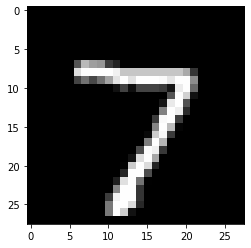

Model prediction: 7


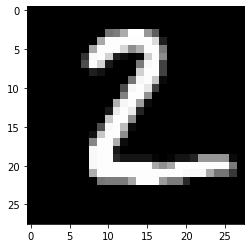

Model prediction: 2


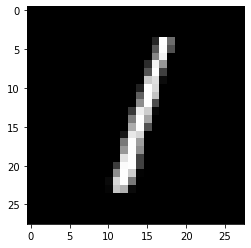

Model prediction: 1


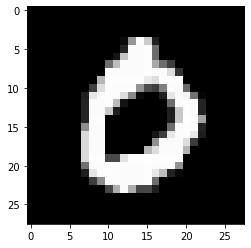

Model prediction: 0


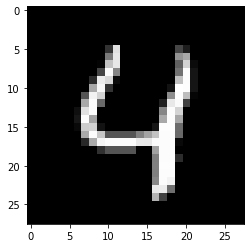

Model prediction: 4


In [63]:
import matplotlib.pyplot as plt

n_images = 5
test_images = x_test[:n_images]
predictions = conv_net(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))